# DS 3000 - Practicum 2

**Student Names**: Tarun Nagesh, Maryam Abdus Salaam, David Yu

**Date**: March 1st, 2025


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1 — The DS Problem

In your own words, formulate the Data Science problem that you were given.


The Data Science (DS) problem for this practicum is to analyze wildlife airstrike data to extract insights into the loss of lives and machinery, common factors, and potential prevantative steps that airlines can take to minimizes these losses.

## **Objectives**
1.

2.

3.

## Question 2 — Clean the data (10 pts)
Load the data using pandas and inspect it.

1) Perform the initial inspection of the data, its shape, types, etc.

2) Evaluate the dataset and perform at least three type of data preparation and justify the approach that is taken to prepare the data for analysis. Data prep can include, but is not limited to: handling missing values, data types, duplicates, etc. You will need to ensure that your data preparation addressed issues in at least 7 fields in the data.

3) Prepare meaningful* summary statistics for 3 continuous variables and 3 categorical variables.
Note: meaningful summary statistics explains the statistical summary of relevant fields in a coherent manner.


In [1]:
import pandas as pd
bird_strike_df = pd.read_csv("Bird_Strikes_1990_2023.csv")
# Displaying first 5 rows
bird_strike_df.head()

/var/folders/7d/kwt0yt6x3c37s1k0wbtcbt0w0000gn/T/ipykernel_5250/518301862.py:2: DtypeWarning: Columns (18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  bird_strike_df = pd.read_csv("Bird_Strikes_1990_2023.csv")


,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,...,SIZE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER
0,608242,6/22/1996,6,1996,NaN,NaN,KSMF,SACRAMENTO INTL,38.69542,-121.59077,...,Medium,NaN,NaN,/Legacy Record=100001/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
1,608243,6/26/1996,6,1996,NaN,NaN,KDEN,DENVER INTL AIRPORT,39.85841,-104.66700,...,Medium,NaN,NaN,/Legacy Record=100002/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
2,608244,7/1/1996,7,1996,NaN,NaN,KOMA,EPPLEY AIRFIELD,41.30252,-95.89417,...,Medium,NaN,NaN,/Legacy Record=100003/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
3,608245,7/1/1996,7,1996,NaN,NaN,KIAD,WASHINGTON DULLES INTL ARPT,38.94453,-77.45581,...,Medium,NaN,NaN,/Legacy Record=100004/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
4,608246,7/1/1996,7,1996,NaN,NaN,KLGA,LA GUARDIA ARPT,40.77724,-73.87261,...,Medium,NaN,NaN,/Legacy Record=100005/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False


In [2]:
# Displaying shape and data types
print(bird_strike_df.shape)
info = bird_strike_df.info()
print(info)

(288810, 100)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288810 entries, 0 to 288809
Data columns (total 100 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   INDEX_NR               288810 non-null  int64  
 1   INCIDENT_DATE          288810 non-null  object 
 2   INCIDENT_MONTH         288810 non-null  int64  
 3   INCIDENT_YEAR          288810 non-null  int64  
 4   TIME                   163633 non-null  object 
 5   TIME_OF_DAY            166394 non-null  object 
 6   AIRPORT_ID             288804 non-null  object 
 7   AIRPORT                288810 non-null  object 
 8   LATITUDE               253309 non-null  float64
 9   LONGITUDE              253308 non-null  float64
 10  RUNWAY                 218852 non-null  object 
 11  STATE                  253309 non-null  object 
 12  FAAREGION              253309 non-null  object 
 13  LOCATION               33939 non-null   object 
 14  ENROUTE_STATE        

In [3]:
# Displaying the number of missing values for each column
print(bird_strike_df.isnull().sum())
print()

# Looking at the rows with the maximum amount of columns missing
print(bird_strike_df.isnull().sum(axis=1).sort_values(ascending = False))

INDEX_NR               0
INCIDENT_DATE          0
INCIDENT_MONTH         0
INCIDENT_YEAR          0
TIME              125177
                   ...  
REPORTED_TITLE         0
SOURCE                 0
PERSON             21134
LUPDATE                0
TRANSFER               0
Length: 100, dtype: int64

42693     43
52161     43
144649    43
37786     42
248211    42
          ..
56926      8
59956      8
86807      8
266947     8
237705     8
Length: 288810, dtype: int64


In [4]:
# Dropping any columns with more than 1/3 of the entries null for it
limit = 288810/3
columns_to_drop = []
for column in bird_strike_df.columns:
    if bird_strike_df[column].isna().sum() > limit:
        columns_to_drop.append(column)

bird_strike_df = bird_strike_df.drop(columns=columns_to_drop)

# Verifying changes happened
print(columns_to_drop)
print()
print(bird_strike_df.isnull().sum())
print()
print(bird_strike_df.shape)


['TIME', 'TIME_OF_DAY', 'LOCATION', 'ENROUTE_STATE', 'REG', 'FLT', 'AMO', 'EMA', 'EMO', 'ENG_2_POS', 'ENG_3_POS', 'ENG_4_POS', 'PHASE_OF_FLIGHT', 'HEIGHT', 'SPEED', 'DISTANCE', 'SKY', 'PRECIPITATION', 'AOS', 'COST_REPAIRS', 'COST_OTHER', 'COST_REPAIRS_INFL_ADJ', 'COST_OTHER_INFL_ADJ', 'DAMAGE_LEVEL', 'OTHER_SPECIFY', 'EFFECT', 'EFFECT_OTHER', 'BIRD_BAND_NUMBER', 'NUM_SEEN', 'NR_INJURIES', 'NR_FATALITIES']

INDEX_NR              0
INCIDENT_DATE         0
INCIDENT_MONTH        0
INCIDENT_YEAR         0
AIRPORT_ID            6
                  ...  
REPORTED_TITLE        0
SOURCE                0
PERSON            21134
LUPDATE               0
TRANSFER              0
Length: 69, dtype: int64

(288810, 69)


In [5]:
# Checking rows' null values
print(bird_strike_df.isnull().sum(axis=1).sort_values(ascending = False))

284911    14
248211    13
281984    13
9202      13
261794    13
          ..
103539     0
103543     0
103545     0
216883     0
144405     0
Length: 288810, dtype: int64


In [6]:
# Dropping any rows with more than 6 of the columns null for it
rows_to_drop = bird_strike_df[bird_strike_df.isna().sum(axis=1) > 6].index
bird_strike_df = bird_strike_df.drop(index=rows_to_drop)
bird_strike_df = bird_strike_df.reset_index(drop=True)

In [7]:
# Checking if the changes worked
print(len(rows_to_drop))
print(bird_strike_df.isnull().sum(axis=1).sort_values(ascending = False))

32853
46535     6
44349     6
75768     6
75767     6
101471    6
         ..
185432    0
185431    0
185430    0
185429    0
127978    0
Length: 255957, dtype: int64


In [8]:
# Checking data types to see if any need to be changed
info = bird_strike_df.info()
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255957 entries, 0 to 255956
Data columns (total 69 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   INDEX_NR           255957 non-null  int64  
 1   INCIDENT_DATE      255957 non-null  object 
 2   INCIDENT_MONTH     255957 non-null  int64  
 3   INCIDENT_YEAR      255957 non-null  int64  
 4   AIRPORT_ID         255957 non-null  object 
 5   AIRPORT            255957 non-null  object 
 6   LATITUDE           223579 non-null  float64
 7   LONGITUDE          223578 non-null  float64
 8   RUNWAY             194617 non-null  object 
 9   STATE              223579 non-null  object 
 10  FAAREGION          223579 non-null  object 
 11  OPID               255955 non-null  object 
 12  OPERATOR           255957 non-null  object 
 13  AIRCRAFT           255957 non-null  object 
 14  AMA                202688 non-null  object 
 15  AC_CLASS           204027 non-null  object 
 16  AC

In [9]:
# Converting date columns to datetime
bird_strike_df["INCIDENT_DATE"] = pd.to_datetime(bird_strike_df["INCIDENT_DATE"])
bird_strike_df["LUPDATE"] = pd.to_datetime(bird_strike_df["LUPDATE"])

# Converting some columns to integers
for col in ["NUM_ENGS", "ENG_1_POS"]:
    bird_strike_df[col] = pd.to_numeric(bird_strike_df[col]).astype("Int64")

## Question 3 — Perform Exploratory Data Analysis (40 pts)
Perform an in-depth analysis by creating visualizations to understand the distribution and relationships within the data, while ensuring that your analysis and explanation of the results tell a story. It's important to select appropriate visualizations based on the type of data. Explain all results.

1) Analyze the proportion of incidents that occur each year.

2) Evaluate the distribution of bird strikes in each state and display the top 20 states.

3) What is the most common bird species that are involved in bird strikes.

4) Perform a comparative analysis of the annual aircraft damage for each phase of flight. Evaluate the results over the last 10 years to determine what patterns exist. Note: this requires a year over year analysis.

5) Analyze the frequency of bird strike incidents that occur on a monthly basis over the last 10 years. Analyze the results to determine when these incidents are more prevalent.  This question requires you to drill deeper into the analysis to determine if the distribution has changed over the last 10 years. Note: this requires a year over year analysis.

6) Perform ONE (1) additional analysis on the distribution. Ensure that you either : 1) perform a comparative analysis by evaluating 3 or more groups within the data or 2) perform a temporal analysis of the patterns over 10 or more years (this requires a year over year analysis of the patterns). Do not repeat any of the previous analysis.


### 1. Analyze the proportion of incidents that occur each year.

In [ ]:
yearly_incidents = bird_strike_df['INCIDENT_YEAR'].value_counts().sort_index()
total_incidents = len(bird_strike_df)

yearly_proportion = yearly_incidents / total_incidents

yearly_analysis = pd.DataFrame({
    'Year': yearly_proportion.index,
    'Count': yearly_incidents.values,
    'Proportion': yearly_proportion.values
})

print("Yearly Incident Proportion:")
print(yearly_analysis)

Yearly Incident Proportion:
    Year  Count  Proportion
0   1990   1808    0.007064
1   1991   2297    0.008974
2   1992   2380    0.009298
3   1993   2402    0.009384
4   1994   2491    0.009732
5   1995   2625    0.010256
6   1996   2794    0.010916
7   1997   3312    0.012940
8   1998   3682    0.014385
9   1999   5025    0.019632
10  2000   5885    0.022992
11  2001   5694    0.022246
12  2002   6074    0.023731
13  2003   5844    0.022832
14  2004   6439    0.025157
15  2005   7128    0.027848
16  2006   7097    0.027727
17  2007   7597    0.029681
18  2008   7514    0.029356
19  2009   9354    0.036545
20  2010   9610    0.037545
21  2011   9865    0.038542
22  2012  10664    0.041663
23  2013  11041    0.043136
24  2014  13255    0.051786
25  2015  13224    0.051665
26  2016  12542    0.049000
27  2017  13810    0.053954
28  2018  15432    0.060291
29  2019  12786    0.049954
30  2020   7108    0.027770
31  2021  10338    0.040390
32  2022  11320    0.044226
33  2023   7520    0

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

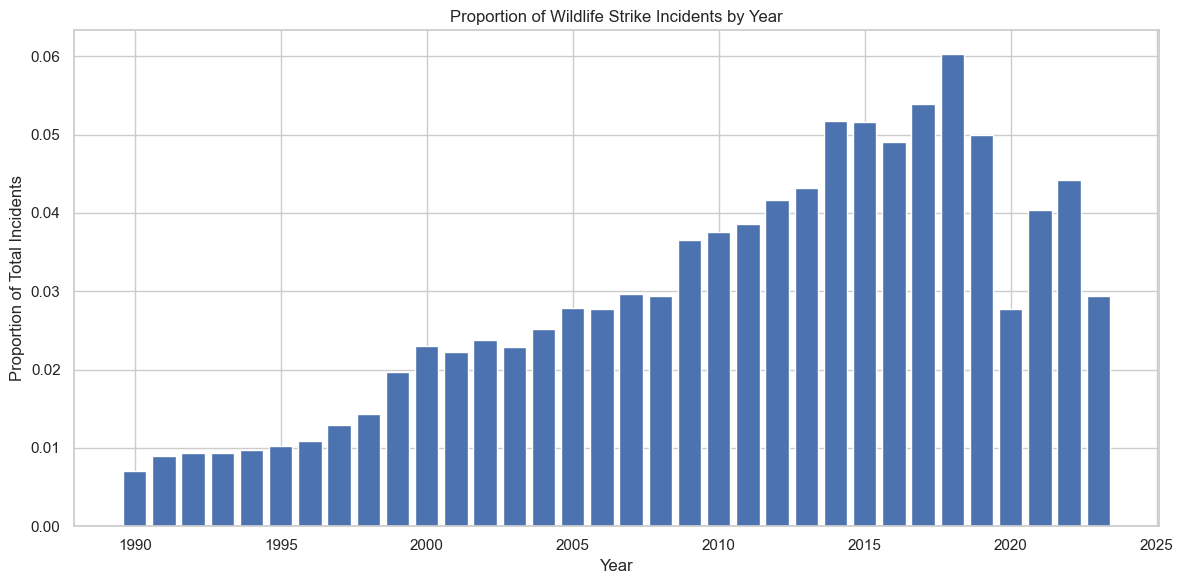

In [16]:
plt.figure(figsize=(12, 6))
plt.bar(yearly_analysis['Year'], yearly_analysis['Proportion'])
plt.title('Proportion of Wildlife Strike Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Total Incidents')
plt.tight_layout()
plt.show()

The data shows a clear upward trend in the proportion of wildlife strike incidents from 1990 to 2023. 
- There's a steady increase in wildlife strike incidents from 1990 to 2023.
- 2018 was a peak year with the highest proportion of incidents.
- There is a sharp drop in 2020, possibly due to COVID and reduced air travel.

### 2. Evaluate the distribution of bird strikes in each state and display the top 20 states.

In [25]:
state_distribution = bird_strike_df['STATE'].value_counts().reset_index()
state_distribution.columns = ['State', 'Number of Strikes']

top_20_states = state_distribution.head(20)
print("Top 20 States with the Most Bird Strikes:")
print(top_20_states)

Top 20 States with the Most Bird Strikes:
   State  Number of Strikes
0     TX              21653
1     CA              19115
2     FL              17868
3     NY              12312
4     IL              10296
5     CO               9885
6     TN               7827
7     PA               7629
8     OH               7044
9     NJ               6309
10    MI               6144
11    MO               6008
12    KY               5801
13    NC               5639
14    GA               4788
15    FN               4501
16    HI               4329
17    DC               4068
18    LA               3737
19    WA               3597


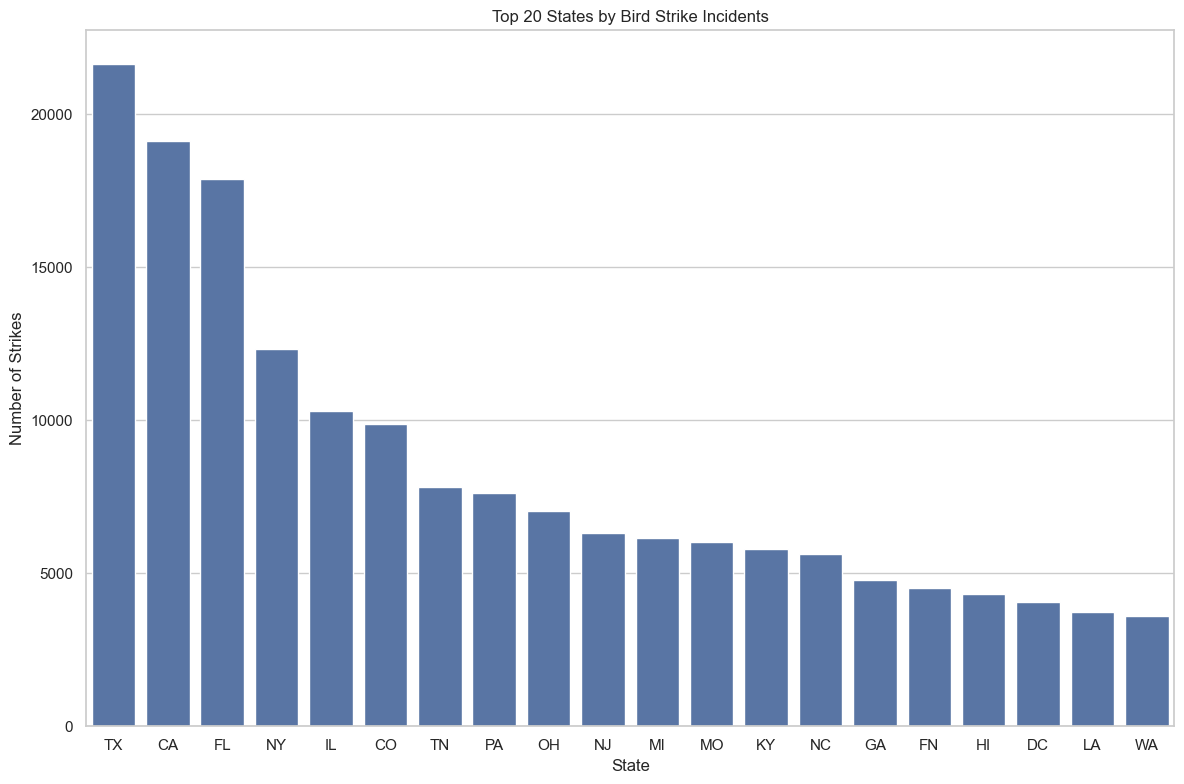

In [24]:
plt.figure(figsize=(12, 8))
sns.barplot(x='State', y='Number of Strikes', data=top_20_states)
plt.title('Top 20 States by Bird Strike Incidents')
plt.xlabel('State')
plt.ylabel('Number of Strikes')
plt.tight_layout()
plt.show()

The results here indicate a geographic pattern in bird strike incidents. As we can see from the graph, Texas leads significantly, followed by California, then Florida. These three states make up a lot of land and also have multiple major airports. Other major travel hubs like New York and Illinois also have a lot of bird strike incidents. This graph shows that the number of bird strikes isn't evenly distributed across states, but is concentrated in regions with a lot of land and heavy air traffic.

### 3. What is the most common bird species that are involved in bird strikes.

In [26]:
species_counts = bird_strike_df['SPECIES'].value_counts().reset_index()
species_counts.columns = ['Bird Species', 'Number of Strikes']

top_species = species_counts.head(10)
print("Top 10 Bird Species Involved in Strikes:")
print(top_species)

Top 10 Bird Species Involved in Strikes:
            Bird Species  Number of Strikes
0   Unknown bird - small              48068
1  Unknown bird - medium              37806
2           Unknown bird              22043
3          Mourning dove              11345
4           Barn swallow               7907
5                  Gulls               7142
6               Killdeer               6992
7       American kestrel               6813
8            Horned lark               6266
9      European starling               5331


The most common bird species that are involved in bird strikes are unknown birds. This could potentially be because the birds in a bird strike are too damaged to identify. Among the birds that were identified, the most common bird to be involved in bird strikes is the Mourning dove.

### 4. Perform a comparative analysis of the annual aircraft damage for each phase of flight. Evaluate the results over the last 10 years to determine what patterns exist. Note: this requires a year over year analysis.

## Helpful resources
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below.

You do not need to cite the official python documentation.
